                     sum_sq    df          F    PR(>F)
C(Game)            1.081228   1.0  10.924357  0.002606
C(ThreeD)          0.102246   1.0   1.033062  0.318143
C(Game):C(ThreeD)  0.003663   1.0   0.037013  0.848827
Residual           2.771275  28.0        NaN       NaN


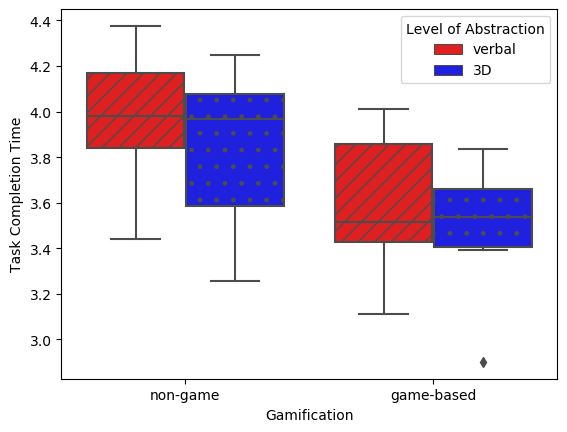

                     sum_sq    df          F    PR(>F)
C(Game)            1.135554   1.0  20.881761  0.000090
C(ThreeD)          0.026009   1.0   0.478287  0.494894
C(Game):C(ThreeD)  0.000274   1.0   0.005036  0.943929
Residual           1.522644  28.0        NaN       NaN


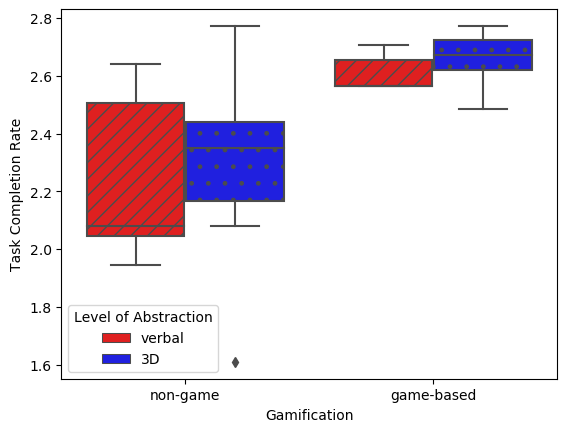

In [18]:
 import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from pandas import DataFrame
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import csv

#define arrays
Game = []
ThreeD = []
Time = []
Rate = []
UMUX = []
Timelog=[]
Ratelog=[]
Engagement = []
Enjoyment = []

#read data
with open('Data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='	')
    line_count = 0
    for row in csv_reader:
        line_count = line_count + 1
        if line_count == 1:
            continue
        Game.append(int(row[0]))
        ThreeD.append(int(row[1]))
        Time.append(float(row[2]))
        Rate.append(float(row[3]))
        UMUX.append(float(row[4]))
        Engagement.append(float(row[5]))
        Enjoyment.append(float(row[6]))

Timelog = np.log(Time)    
Ratelog = np.log(Rate)  
#create data
df = pd.DataFrame({'Game': Game,'3D': ThreeD,'Timelog': Timelog})

#perform two-way ANOVA  - task completion time
model = ols('Timelog ~ C(Game) + C(ThreeD) + C(Game):C(ThreeD)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

newGame = []
for g in Game:
    if g == 0:
        newg = "non-game"
    else:
        newg = "game-based"
    newGame.append(newg)
    
newAbs = []
for a in ThreeD:
    if a == 0:
        newa = "verbal"
    else:
        newa = "3D"
    newAbs.append(newa)
    
df = DataFrame(list(zip(newGame, newAbs,Timelog)),
               columns =['Gamification', 'Level of Abstraction','Task Completion Time'])

ax = sns.boxplot(y='Task Completion Time', x='Gamification',
                 data=df,
                 palette=['r','b'],
                 hue='Level of Abstraction',
                 order=["non-game", "game-based"],
                 hue_order = ['verbal', '3D'])
hatches = ["//", ".", "//", "."]
for hatch, patch in zip(hatches, ax.artists):
    patch.set_hatch(hatch)

plt.savefig("Time")
plt.show()



#perform two-way ANOVA  - task completion rate
model = ols('Ratelog ~ C(Game) + C(ThreeD) + C(Game):C(ThreeD)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))


df = DataFrame(list(zip(newGame, newAbs,Ratelog)),
               columns =['Gamification', 'Level of Abstraction','Task Completion Rate'])

ax = sns.boxplot(y='Task Completion Rate', x='Gamification',
                 data=df,
                 palette=['r','b'],
                 hue='Level of Abstraction',
                 order=["non-game", "game-based"],
                 hue_order = ['verbal', '3D'])
hatches = ["//", ".", "//", "."]
for hatch, patch in zip(hatches, ax.artists):
    patch.set_hatch(hatch)

plt.savefig("Rate")
plt.show()




Text(0, 0.5, 'UMUX')

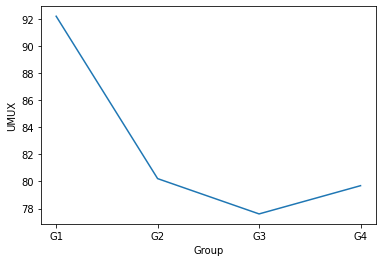

In [16]:
UMUX_mean = []
UMUX_mean.append(sum(UMUX[0:8])/8)
UMUX_mean.append(sum(UMUX[8:16])/8)
UMUX_mean.append(sum(UMUX[16:24])/8) 
UMUX_mean.append(sum(UMUX[24:32])/8)
plt.plot(['G1','G2','G3','G4'],UMUX_mean)
plt.xlabel('Group')
plt.ylabel('UMUX')

Text(0, 0.5, 'Engagement')

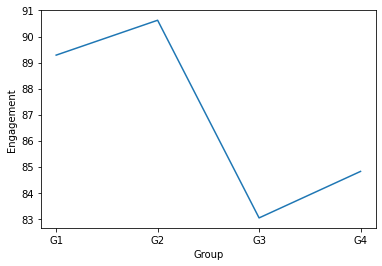

In [17]:
Engagement_mean = []
Engagement_mean.append(sum(Engagement[0:8])/8)
Engagement_mean.append(sum(Engagement[8:16])/8)
Engagement_mean.append(sum(Engagement[16:24])/8) 
Engagement_mean.append(sum(Engagement[24:32])/8)
plt.plot(['G1','G2','G3','G4'],Engagement_mean)
plt.xlabel('Group')
plt.ylabel('Engagement')

Text(0, 0.5, 'Enjoyment')

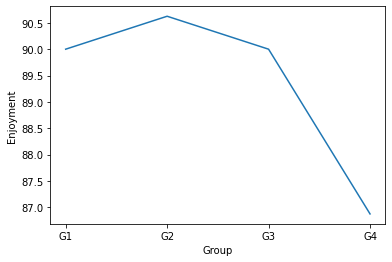

In [18]:
Enjoyment_mean = []
Enjoyment_mean.append(sum(Enjoyment[0:8])/8)
Enjoyment_mean.append(sum(Enjoyment[8:16])/8)
Enjoyment_mean.append(sum(Enjoyment[16:24])/8) 
Enjoyment_mean.append(sum(Enjoyment[24:32])/8)
plt.plot(['G1','G2','G3','G4'],Enjoyment_mean)
plt.xlabel('Group')
plt.ylabel('Enjoyment')

In [19]:
import scipy.stats as stats
stats.levene(Time[0:8],Time[8:16],Time[16:24],Time[24:32],center='median')

LeveneResult(statistic=0.8504392148437017, pvalue=0.47812780445764336)

In [20]:
stats.levene(Rate[0:8],Rate[8:16],Rate[16:24],Rate[24:32],center='median')

LeveneResult(statistic=1.8303393213572854, pvalue=0.16455395045890409)

In [23]:
stats.shapiro(Time)

ShapiroResult(statistic=0.9635542035102844, pvalue=0.3425343632698059)

In [24]:
stats.kstest(Time, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [25]:
stats.shapiro(Rate)

ShapiroResult(statistic=0.9110801815986633, pvalue=0.011999428272247314)

In [26]:
stats.kstest(Rate, 'norm')

KstestResult(statistic=0.9999997133484281, pvalue=8.637110608912666e-210)

In [27]:
stats.shapiro(Timelog)


ShapiroResult(statistic=0.9769195914268494, pvalue=0.7063809037208557)

In [28]:
stats.kstest(Timelog, 'norm')

KstestResult(statistic=0.9981426313625933, pvalue=8.049510134851872e-88)

In [29]:
stats.shapiro(Ratelog)

ShapiroResult(statistic=0.862653374671936, pvalue=0.000789577781688422)

In [30]:
stats.kstest(Ratelog, 'norm')

KstestResult(statistic=0.9462396895483368, pvalue=4.740308120689423e-41)